In [2]:
import os

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [27]:
import_dir = os.path.join( 'export', 'endogenous_wt' )
import_filename = 'events_endogenous_wt_1.hdf5'
import_path = os.path.join( import_dir, import_filename )

with h5py.File( import_path, 'r' ) as file:
    
    fs = file['fs'][0][0]
    mark_keys = [ k for k in file.keys()
                  if 'mark_' in k ]
    
    raw_t_data = { 'eventTime': (1 / fs) * file['eventFrames'][0] }
    raw_mark_data = { k: file[k][0]
                      for k in mark_keys }
    
    df = pd.DataFrame( { **raw_t_data, **raw_mark_data } )

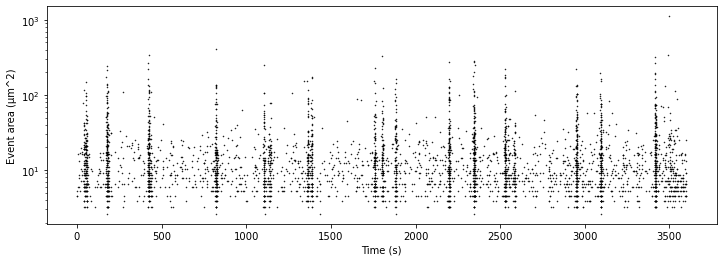

In [30]:
ts = df['eventTime']
ys = df['mark_area']

plt.figure( figsize = (12, 4) )

plt.semilogy( ts, ys, 'k.', markersize = 1 )

plt.xlabel( 'Time (s)' )
plt.ylabel( 'Event area (µm^2)' )

plt.show()